2D Hubbard Model Example
========

This is an example of how to run SimpleUpdate for 2D Fermionic PEPS.
We'll define a 2D Hubbard Hamiltonian first:

In [36]:
import numpy as np
import itertools
from quimb.tensor.fermion_2d_tebd import Hubbard2D, SimpleUpdate
from pyblock3.algebra import fermion_operators as ops

t=1
u=4
Lx = Ly = 2
mu = -0.9
Ham = Hubbard2D(t, u, Lx, Ly, mu=mu)
efci = -5.702748483462062


Now we'll generate some initial guess to begin our SimpleUpdate. In quimb, we can use an integer array with shape (Lx, Ly) to generate a mean field inital guess. The integer value encodes the spin state for that site, specifically:

0: |vac> 
1: |+> 
2: |-> 
3: |-+> 

Here we use a mean field AFM lattice as initial guess


In [37]:
state_array = np.zeros([Lx,Ly])
state_array[0,0] = state_array[1,1] = 1 # up spin at (0,0) and (1,1)
state_array[0,1] = state_array[1,0] = 2 # down spin at (0,1) and (1,0)

In [38]:
from quimb.tensor.fermion_2d import gen_mf_peps

psi = gen_mf_peps(state_array) # this is now a 2d mean field PEPS
norm = psi.compute_norm()
print(norm)

1.0


We can compute the Sz at each site to make sure it's a fully AFM state

In [39]:
sz = ops.measure_sz()
nop = ops.count_n()

sz_ops = {(ix,iy): sz for ix, iy in itertools.product(range(Lx), range(Ly))}
n_ops = {(ix,iy): nop for ix, iy in itertools.product(range(Lx), range(Ly))}

sz_expecs = psi.compute_local_expectation(sz_ops, return_all=True, normalized=True)
n_expecs = psi.compute_local_expectation(n_ops, return_all=True, normalized=True)

for ix, iy in itertools.product(range(Lx), range(Ly)):
    print("(%i, %i): SZ=%.2f, N=%i"%(ix,iy,sz_expecs[(ix,iy)][0], n_expecs[(ix,iy)][0]))


(0, 0): SZ=0.50, N=1
(0, 1): SZ=-0.50, N=1
(1, 0): SZ=-0.50, N=1
(1, 1): SZ=0.50, N=1


Now we construct our SimpleUpdate Object

In [40]:
su = SimpleUpdate(
    psi,
    Ham,
    chi=128,  # boundary contraction bond dim for computing energy
    D = 12,
    compute_energy_every=100,
    compute_energy_per_site=False,
    keep_best=True,
    ordering = 'random',
    gauge_smudge = 1e-6,
    callback=None
)
tau = 0.001
su.evolve(6000, tau=tau)

sz_expecs = su.get_state().compute_local_expectation(sz_ops, return_all=True, normalized=True)
n_expecs = su.get_state().compute_local_expectation(n_ops, return_all=True, normalized=True)

for ix, iy in itertools.product(range(Lx), range(Ly)):
    print("(%i, %i): SZ=%.2f, N=%.2f"%(ix,iy,sz_expecs[(ix,iy)][0], n_expecs[(ix,iy)][0]))

n=6000, tau=0.001, energy~-5.701882: 100%|██████████| 6000/6000 [11:17<00:00,  8.85it/s]


(0, 0): SZ=0.02, N=1.13
(0, 1): SZ=-0.02, N=1.13
(1, 0): SZ=-0.02, N=1.13
(1, 1): SZ=0.02, N=1.13


In [41]:
su1 = SimpleUpdate(
    psi,
    Ham,
    chi=128,  # boundary contraction bond dim for computing energy
    D = 16,
    compute_energy_every=100,
    compute_energy_per_site=False,
    keep_best=True,
    ordering = 'random',
    gauge_smudge = 1e-6,
    callback=None
)
tau = 0.001
su1.evolve(6000, tau=tau)

sz_expecs = su1.get_state().compute_local_expectation(sz_ops, return_all=True, normalized=True)
n_expecs = su1.get_state().compute_local_expectation(n_ops, return_all=True, normalized=True)

for ix, iy in itertools.product(range(Lx), range(Ly)):
    print("(%i, %i): SZ=%.2f, N=%.2f"%(ix,iy,sz_expecs[(ix,iy)][0], n_expecs[(ix,iy)][0]))
    print("(%i, %i): SZ=%.2f, N=%.2f"%(ix,iy,sz_expecs[(ix,iy)][0], n_expecs[(ix,iy)][0]))

n=6000, tau=0.001, energy~-5.701889: 100%|██████████| 6000/6000 [11:08<00:00,  8.98it/s]


(0, 0): SZ=-0.01, N=1.08
(0, 0): SZ=-0.01, N=1.08
(0, 1): SZ=0.01, N=1.08
(0, 1): SZ=0.01, N=1.08
(1, 0): SZ=0.01, N=1.08
(1, 0): SZ=0.01, N=1.08
(1, 1): SZ=-0.01, N=1.08
(1, 1): SZ=-0.01, N=1.08


Unfortunately, PEPS uses approximate contraction and certain symmetry in the initial guess may not be preserved

In [42]:
su2 = SimpleUpdate(
    psi,
    Ham,
    chi=128,  # boundary contraction bond dim for computing energy
    D = 24,
    compute_energy_every=100,
    compute_energy_per_site=False,
    keep_best=True,
    ordering = 'random',
    gauge_smudge = 1e-6,
    callback=None
)
tau = 0.001
su2.evolve(6000, tau=tau)

sz_expecs = su2.get_state().compute_local_expectation(sz_ops, return_all=True, normalized=True)
n_expecs = su2.get_state().compute_local_expectation(n_ops, return_all=True, normalized=True)

for ix, iy in itertools.product(range(Lx), range(Ly)):
    print("(%i, %i): SZ=%.2f, N=%.2f"%(ix,iy,sz_expecs[(ix,iy)][0], n_expecs[(ix,iy)][0]))

n=6000, tau=0.001, energy~-5.699187: 100%|██████████| 6000/6000 [13:25<00:00,  7.45it/s]


(0, 0): SZ=0.06, N=1.01
(0, 1): SZ=-0.06, N=1.01
(1, 0): SZ=-0.06, N=1.01
(1, 1): SZ=0.06, N=1.01


In [44]:
psi0 = su.get_state()
psi1 = su1.get_state()
psi2 = su2.get_state()

max_bond = 128
ene0 = psi0.compute_local_expectation(Ham.terms, normalized=True, max_bond=max_bond)
z0 = psi0.compute_local_expectation(sz_ops, return_all=True, normalized=True, max_bond=max_bond)
n0 = psi0.compute_local_expectation(n_ops, return_all=True, normalized=True, max_bond=max_bond)
ene1 = psi1.compute_local_expectation(Ham.terms, normalized=True, max_bond=max_bond)
z1 = psi1.compute_local_expectation(sz_ops, return_all=True, normalized=True, max_bond=max_bond)
n1 = psi1.compute_local_expectation(n_ops, return_all=True, normalized=True, max_bond=max_bond)
ene2 = psi2.compute_local_expectation(Ham.terms, normalized=True, max_bond=max_bond)
z2 = psi2.compute_local_expectation(sz_ops, return_all=True, normalized=True, max_bond=max_bond)
n2 = psi2.compute_local_expectation(n_ops, return_all=True, normalized=True, max_bond=max_bond)
print("chi=%i"%max_bond)
print(ene0, su.energies[-1], [val[0] for val in z0.values()], [val[0] for val in n0.values()])
print(ene1, su1.energies[-1], [val[0] for val in z1.values()], [val[0] for val in n1.values()])
print(ene2, su2.energies[-1], [val[0] for val in z2.values()], [val[0] for val in n2.values()])

chi=128
-5.701882215719689 -5.701882215719689 [0.02132075763649735, -0.0213207576409023, -0.02132075763619834, 0.021320757640603233] [1.1301947125656033, 1.1301947125660177, 1.1301947125660234, 1.1301947125656127]
-5.701889174439364 -5.701889174439364 [-0.00907496003109931, 0.009062174991132932, 0.009057952980593226, -0.009045148380751517] [1.079505995534109, 1.079525465973902, 1.0795266433543542, 1.079496290829968]
-5.699187240224151 -5.699187240224151 [0.061339504184178995, -0.061328171581932406, -0.06134870578994964, 0.06133737150197102] [1.0106123764105819, 1.0110268682097463, 1.0118180744912104, 1.0113771545526176]


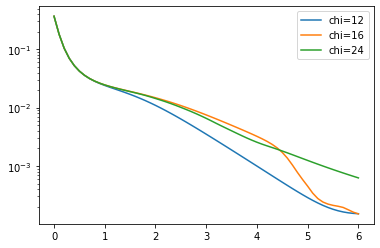

In [43]:
from matplotlib import pyplot as plt
tlst = np.arange(len(su.energies)) * tau * 100
plt.plot(tlst, (np.asarray(su.energies)-efci)/abs(efci), label="chi=12")
plt.plot(tlst, (np.asarray(su1.energies)-efci)/abs(efci), label="chi=16")
plt.plot(tlst, (np.asarray(su2.energies)-efci)/abs(efci), label="chi=24")
plt.yscale("log")
plt.legend()

In [45]:
su3 = SimpleUpdate(
    psi,
    Ham,
    chi=128,  # boundary contraction bond dim for computing energy
    D = 36,
    compute_energy_every=100,
    compute_energy_per_site=False,
    keep_best=True,
    ordering = 'random',
    gauge_smudge = 1e-6,
    callback=None
)
tau = 0.001
su3.evolve(6000, tau=tau)

sz_expecs = su3.get_state().compute_local_expectation(sz_ops, return_all=True, normalized=True)
n_expecs = su3.get_state().compute_local_expectation(n_ops, return_all=True, normalized=True)

for ix, iy in itertools.product(range(Lx), range(Ly)):
    print("(%i, %i): SZ=%.4f, N=%.4f"%(ix,iy,sz_expecs[(ix,iy)][0], n_expecs[(ix,iy)][0]))

n=6000, tau=0.001, energy~-5.702278: 100%|██████████| 6000/6000 [16:12<00:00,  6.17it/s]  


(0, 0): SZ=0.0131, N=0.9095
(0, 1): SZ=-0.0134, N=0.9091
(1, 0): SZ=-0.0135, N=0.9087
(1, 1): SZ=0.0138, N=0.9098
